![](https://storage.googleapis.com/kaggle-competitions/kaggle/3136/logos/header.png)

<img src="" class="sc-hYWXLp dTSWAQ">

# Step3 - Classification
### Breast Cancer Wisconsin (Diagnostic) Data Set : Predict whether the cancer is benign or malignant(https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
### Titanic: Machine Learning from Disaster(https://www.kaggle.com/c/titanic)
#### 타이타닉 침몰 사고의 실제 데이터를 통해, 생존유무를 예측하는 문제를 Predictive Analytics 기법으로 풀어봅니다.

# Learning Plan

#### 이 과정을 통해서 배울 수 있는 것은 아래와 같습니다.
- 첫째, Classification을 이용한 데이터 분석의 전체 Workflow
- 둘째, ML - Classification 알고리즘

### Lesson 3-1: Overview - Classification

### Lesson 3-2: EDA

### Lesson 3-3: Preprocessing

### Lesson 3-4: Model Selection

### Lesson 3-5: Model Evaluation & Prediction
                                                                                                                  

# Reference 

- '파이썬 머신러닝 완벽가이드' by 권철민: https://wikibook.co.kr/ml-definitive-guide/
- EDA To Prediction(DieTanic) by [Ashwini Swain](https://www.kaggle.com/ash316) : https://www.kaggle.com/ash316/eda-to-prediction-dietanic

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lesson 3-1: Overview - Classification

## 3-1-1 : 로지스틱 회귀 (Logistic Regression)

### 이진분류 (Binary Classification)

* 예시
  * 이메일 : 스팸 / 스팸 아님
  * 온라인 거래 : 도용 / 도용 아님
  * 종양 : 심각함(Malignant) / 심각하지 않음(Benign)

In [2]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

print(breast_cancer.DESCR)

import pandas as pd

data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['malignant'] = 1 - breast_cancer.target # 0 for malignant and 1 for benign in the original dataset

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Binary Classification의 특징

종속변수(y)가 0 또는 1의 값을 가진다.

<AxesSubplot:xlabel='mean radius', ylabel='malignant'>

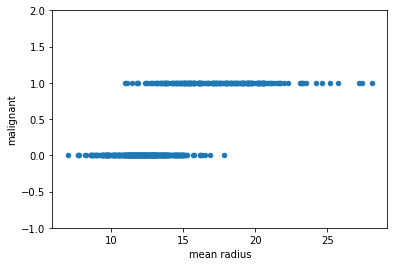

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

data.plot(x='mean radius', y='malignant', kind='scatter', ylim=[-1,2])

### 선형 회귀(Linear Regression)으로 분류하면 어떨까?

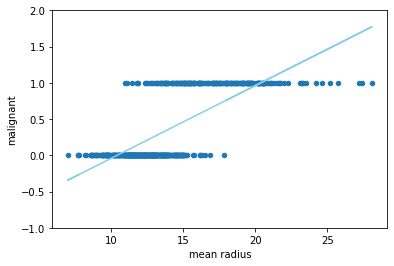

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(data[['mean radius']], data['malignant'])

data.plot(x='mean radius', y='malignant', kind='scatter', ylim=[-1,2])
plt.plot(data['mean radius'], lr.predict(data[['mean radius']]), 'skyblue');

  * 선형회귀로 모델을 만든 다음에 $h_\theta(x) = 0.5$보다 작으냐 크냐로 y값을 예측한다.
  * 못 할 건 없지만
  * y는 0 또는 1이다.
  * $h_\theta(x) $이 0보다 작거나 1보다 큰 것은 이상하다.
  * 그래서 $1 \geq h_\theta(x) \geq 0$인 모델이 필요하다.
  * 로지스틱 회귀 (Logistic Regreesion) 는 $1 \geq h_\theta(x) \geq 0$ 로 만들어준다.

### 가설 (Hypothesis)

### Goal
$$1 \geq h_\theta(x) \geq 0$$

### Solution 
$$g(\theta^Tx)$$

###  Sigmoid function (Logistic function)

  $$
  g(z) = \frac{1}{1 + e^{-z}}
  $$

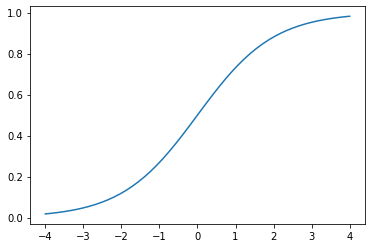

In [5]:
import numpy as np
z = np.linspace(-4, 4)
plt.plot(z, [1/(np.e**(-i) + 1) for i in z])

* Sigmoid function 의 특징 = 항상 0보다 크고 1보다 작은 값을 리턴함. 

### 가설 이해하기

$h_\theta(x)$ : 입력값 x에 대해서 y=1일 확률의 추정값'

예를 들어, 0.7이면 70%의 확률로 심각한 종양


$h_\theta(x) = P(y=1|x;\theta)$: 입력값 x와 매개변수 $\theta$가 주어졌을  때 y = 1일 확률

#### 어떻게 이게 확률인가요?

확률 : 0보다 같거나 크고, 다 더해서 1이 되면 됨

### Decision boundary

로지스틱 회귀 (Logistic regression)는 $h_\theta(x)$ >= 0.5일 때 y=1로 예측한다.


### Cost Function

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}
$$

### 매개변수 (parameters) $\theta$를 어떻게 구할까?

$$
Cost(h_\theta(x^{(i)}), y^{(i)})) = \begin{cases}
  -\log(h_\theta(x^{(i)})), & \text{if } y = 1 \\
  -\log(1 -h_\theta(x^{(i)})), & \text{if } y = 0
\end{cases}
$$

* y = 1일 때, $h_\theta(x)$ = 1이면 cost가 0이고, $h_\theta(x)$ = 1에서 멀어질 수록 무한대에 가까워진다.
* y = 0일 때, $h_\theta(x)$ = 0이면 cost가 0이고, $h_\theta(x)$ = 0에서 멀어질 수록 무한대에 가까워진다.
* 예측값이 정답과 맞으면 cost가 0, 많이 틀릴 수록 cost를 많이 준다는 것을 알 수 있다.

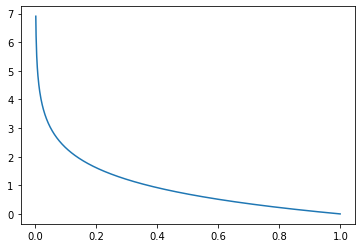

In [6]:
h_range = np.linspace(0.001, 0.999, num=1000)
plt.plot(h_range, -np.log(h_range))

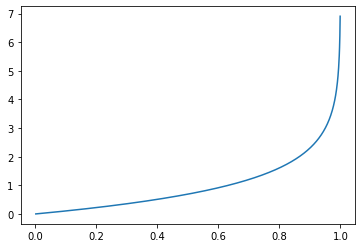

In [7]:
plt.plot(h_range, -np.log(1 - h_range))

### Simplified cost function

[Reference - Logistic Regression's Cost Function](https://wikidocs.net/4289) 

$$
J(\theta) = \frac{1}{n}\sum_{i=1}^{n}Cost(h_\theta(x^{(i)}, y^{(i)}))
$$

$$
Cost(h_\theta(x^{(i)}), y^{(i)})) = \begin{cases}
  -\log(h_\theta(x^{(i)})), & \text{if } y = 1 \\
  -\log(1 -h_\theta(x^{(i)})), & \text{if } y = 0
\end{cases}
$$

$$
Cost(h_\theta(x^{(i)}), y^{(i)})) = -y\log(h_\theta(x^{(i)})) - (1-y)log(1 - h_\theta(x^{(i)}))
$$

* y = 1일 때, y = 0일 때 두 식이 같아진다.

### Coding 실습

In [8]:
X = data.drop('malignant', axis=1)
y = data['malignant']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(C=1.0)

In [13]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
model.score(X_train, y_train)

0.9553990610328639

In [15]:
model.score(X_test, y_test)

0.9230769230769231

In [16]:
from sklearn.linear_model import LogisticRegressionCV

In [17]:
model = LogisticRegressionCV()

In [18]:
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegressionCV()

In [19]:
model.score(X_train, y_train)

0.9765258215962441

In [20]:
model.score(X_test, y_test)

0.916083916083916

## 트리 모델(Trees Models)과 선형 모델(Linear Models)의 비교

* 어떤 모델이 더 좋을지는 주어진 문제에 달려있다.
* 특징 변수(features)와 반응 변수(responnse)의 관계가 선형적이면, 선형 모델이 잘 동작한다.
* 특징 변수(features)와 반응 변수(responnse)의 관계가 심하게 비선형적이면, 트리 모델이 더 잘할 수 있다.

![tree vs. linear](https://files.slack.com/files-pri/T25783BPY-F61LVAA2W/screenshot.png?pub_secret=3a3a5bd690)

* 정확도가 목적의 전부가 아닌 경우, 시각화나 해석 가능성 등의 이유로 트리 모델을 선택할 수도 있다.

## Lesson 3-2: Exploratory Data Analysis(EDA)

## 3-2-1 : 문제 정의하기

### 타이타닉 침몰 사고의 실제 데이터를 통해, 생존유무를 예측합니다.

## 3-2-2 : 훈련, 테스트 데이터 확인하기

In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
filename = '/content/drive/My Drive/nhfire/data/titanic/train.csv'
#filename = './data/titanic/train.csv'

In [23]:
data=pd.read_csv(filename)

In [24]:
data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 값이 없는 데이터 확인하기

In [26]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### <관찰 결과>
- **Age, Cabin, Embarked** 가 null value 를 가지고 있습니다.

### 데이터로 부터 1차적인 Insight 알아내기 : 생존자는 몇명?

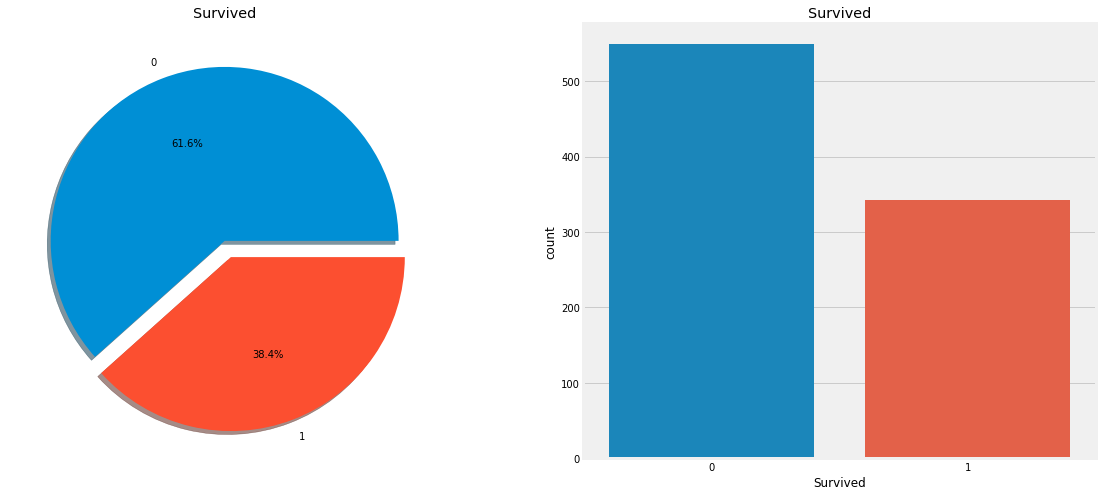

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### <관찰 결과>
- 많은 승객이 Tatanic 충돌 사고로부터 살아남지 못했습니다.

- Training Data Set을 보면, 탑승한 891 명의 승객 중 350 명만이 살아 남았습니다. 즉, 전체 Training Data Set의 승객중 **38.4%** 만이 충돌에서 살아 남았습니다. 데이터에서 더 나은 통찰력을 얻고 어떤 카테고리의 승객이 생존했는지, 생존하지 못했는지를 알아 내기 위해 더 깊게 분석해야 할 필요가 있습니다.

앞으로 Training Data Set의 다른 feature들을 사용하여 생존율을 확인해 보도록 하겠습니다. 예를들어 성별, 출생지, 나이 등의 feature들이 있습니다.

먼저 다양한 유형의 Feature들에 대해서 이해해야 합니다.

## 3-2-3 : Features 분석하기

## Types Of Features

* Categorical Features
* Ordinal Features
* Continous Features
* Discrete Features

### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

범주형 변수(categorical variable)는 두 개 이상의 범주(Category)가 있고 해당 feature의 각 값을 범주별로 나눌 수 있습니다. 예를 들어 성별(Sex)은 두 범주(남성과 여성)가 있는 범주형 변수입니다. 범주형 변수는 정렬(Sorting)하거나 순서부여(Ordering)를 할 수 없습니다. 범주형 변수는 **Nominal Variables(명목 변수)** 라고도 합니다.

**Categorical Features in the dataset: Sex,Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

순서형 변수는 범주형 변수과 유사하지만 차이점은 값 사이의 정렬(Sorting)하거나 순서부여(Ordering)를 할 수 있다는 것입니다. 예 : **Height(키=신장)** 변수인 경우에 **Tall, Medium, Short** 값이 순서(Order)가 있습니다.

**Ordinal Features in the dataset: PClass**

### Continous Features:
A feature is said to be continous if it can take infinate values between any two points or between the minimum or maximum values in the features column.

연속형 변수는 임의의 두 점 혹은 최소값과 최대값 사이에 무한 값을 취할 수 있는 경우를 말한다.

**Continous Features in the dataset: Age**

### Discrete Features:
A feature is said to be discrete if it can take countable values between any two points or between the minimum or maximum values in the features column.

이산형 변수는 임의의 두 점 혹은 최소값과 최대값 사이에 유한 값을 취할 수 있는 경우를 말한다.

**Discrete Features in the dataset: SibSp, Parch**

## Sex--> Categorical Feature

In [28]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

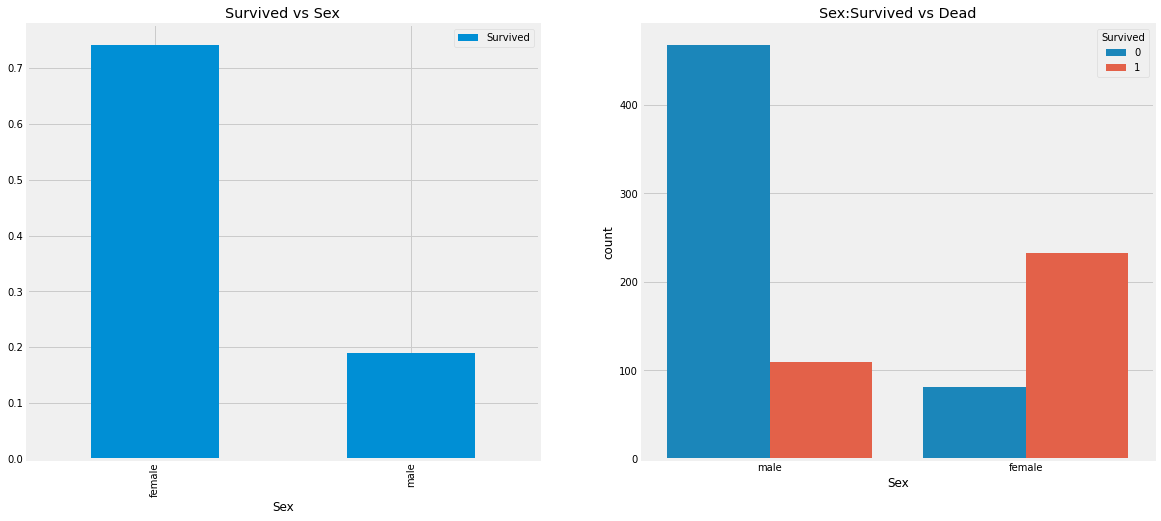

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

### <관찰 결과>

- 위의 그래프는 흥미로운 결과를 보여 줍니다. 살아남은 여성의 수가 살아남은 남성의 수의 2배 정도 됩니다. 또한  **여성의 생존율은 거의 75% 인데 반해, 남성의 생존율은 거의 18-19% 정도 됩니다.**

위의 그래프는 **Sex(성별)이 매우 중요한 feature** 임을 보여줍니다. 그러나 이것이 최선일까요? 다른 feature들도 살펴보도록 합시다.

## Pclass --> Ordinal Feature

In [30]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


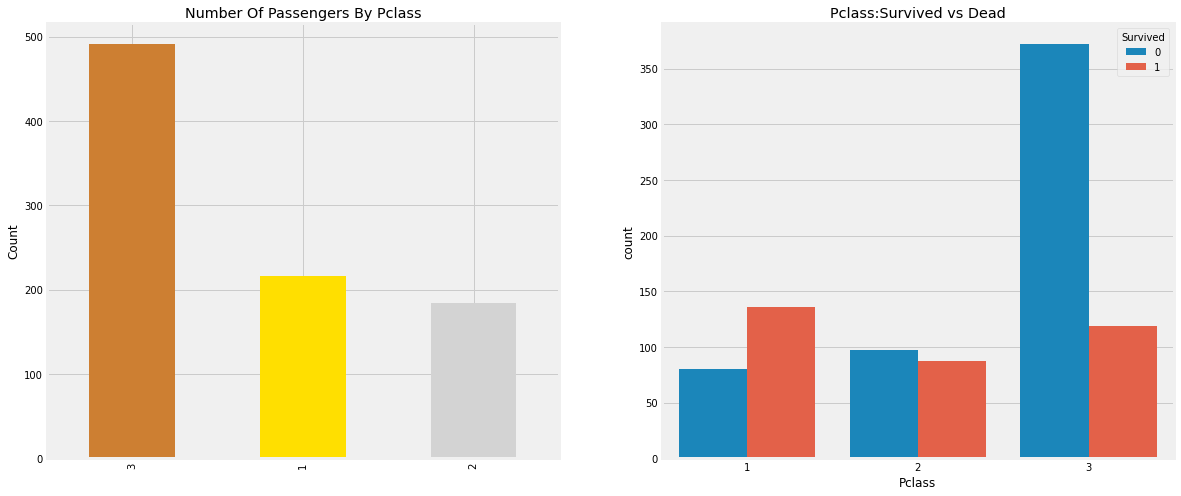

In [31]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

### <관찰 결과>

- 그래프를 통해 Pclass1의 승객들이 구조 작업시에 높은 우선 순위를 부여 받았음을 유추해 볼 수 있습니다. Pclass3의 승객 수는 훨씬 많았지만 생존율은 약 **25%** 로 매우 낮습니다.

- Pclass1은 **63%** 인 반면 Pclass2는 **48%** 입니다. 이를 통해 돈과 지위가 생존율에 영향을 주었음을 알 수 있습니다.

조금도 깊은 이해를 위해서 **Sex and Pclass** 두가지 feature들을 함께 고려했을 때의 생존율을 확인해 보도록 합시다.

In [32]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

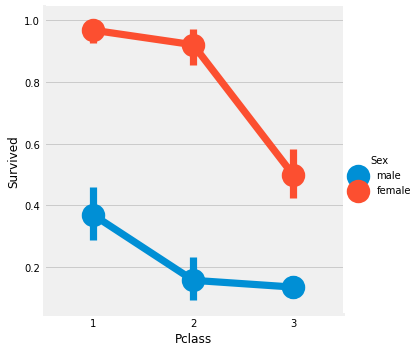

In [33]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

### <관찰 결과>

**FactorPlot** 는 범주형 값을 분리해서 그래프로 볼 때, 쉽고 간단한 코딩이 가능한 이유로 자주 쓰입니다.

- **CrossTab** 및 **FactorPlot** 을 보면 **Pclass1  여성** 은 **95-96%** 에 해당하는 생존율을 볼 수 있습니다. 실제로 Pclass1의 94명의 여성 중 3명만이 사망했습니다.

- Pclass와 관계없이 여성들은 구출하는 동안 최우선 순위를 부여 받았다는 것이 유추해 볼 수 있습니다. Pclass1의 남성조차도 생존율이 매우 낮습니다.

이를 근거로 Pclass가 중요한 feature인 것을 알 수 있습니다.

## Age--> Continous Feature


In [34]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


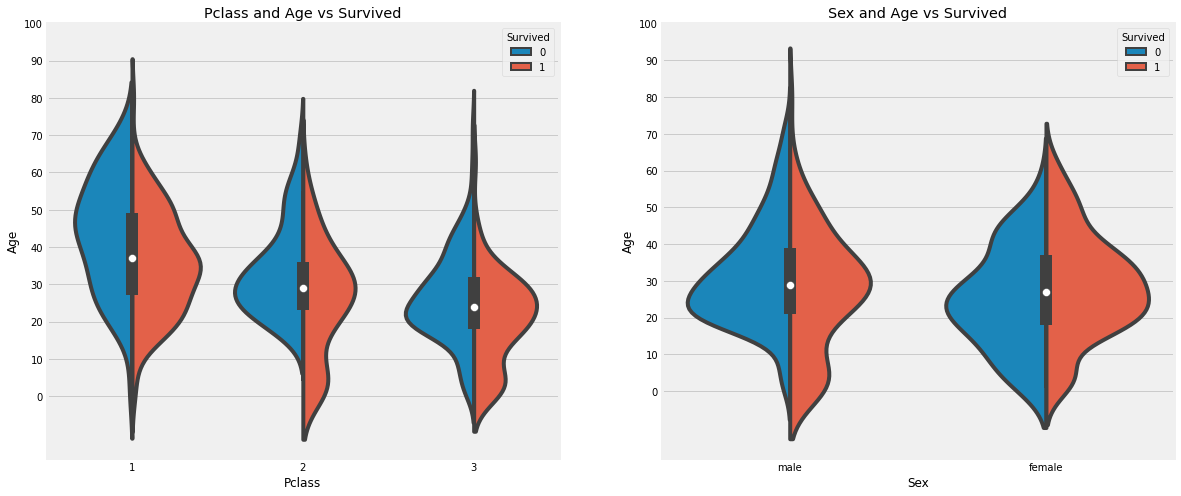

In [35]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### <관찰 결과>

1) 어린이의 수는 Pclass의 번호가 증가에 맞추어 함께 중가함. 10세 이하 어린이의 생존율이 Pclass와 관계없이 양호한 것으로 보입니다.

2) Pclass1에서 20 세에서 50 세 사이의 Passenegers에 대한 생존 기회는 높으며 여성에게는 훨씬 더 좋습니다.

3) 남성의 경우 생존율은 연령이 증가함에 따라 감소합니다.

앞서 살펴본 바와 같이 Age feature는 **177** 개의 널(null) 값을 갖습니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당 할 수 있습니다.

그러데 문제는 평균 연령(29세)를 할당하기에는 Titanic 데이터의 분포상 연령대가 높은 사람들이 많이 존재한다는 것입니다. 이런 경우...예를들어, 평균 연령(29세)를 4세 어린이에게 배정한다면 문제가 될 것입니다. 이와 같이 승객의 Age feature의 NaN 값을 대체하기 위해 가장 적절한 방법은 무엇일까요?

한가지 방법은 **Name** feature를 이용하는 것입니다.. Name feature를 살펴보면 이름에 Mr.이나 Mrs.과 같은 호칭이 있다는 것을 알 수 있습니다. 따라서 Name feature가 Mr. 혹은 Mrs. 인 Age 의 평균값을 각 그룹에 NaN 값을 대체하기 위해 할당 할 수 있습니다.

In [36]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

Name feature에서 호칭을 추출해 내는데 아래와 같은 Regular Expression 을 사용합니다.

- Regex: **[A-Za-z]+)\.**. 

이 Regular Expression의 의미는 **A-Z 또는 a-z** 사이에 있고 **.(점)** 이 뒤에 오는 문자열을 찾습니다.

In [37]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle이나 Mme와 같은 호칭은 Miss와 같은 값으로 대체합니다.

In [38]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [39]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [40]:
## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [41]:
data.Age.isnull().any() #So no null values left finally 

False

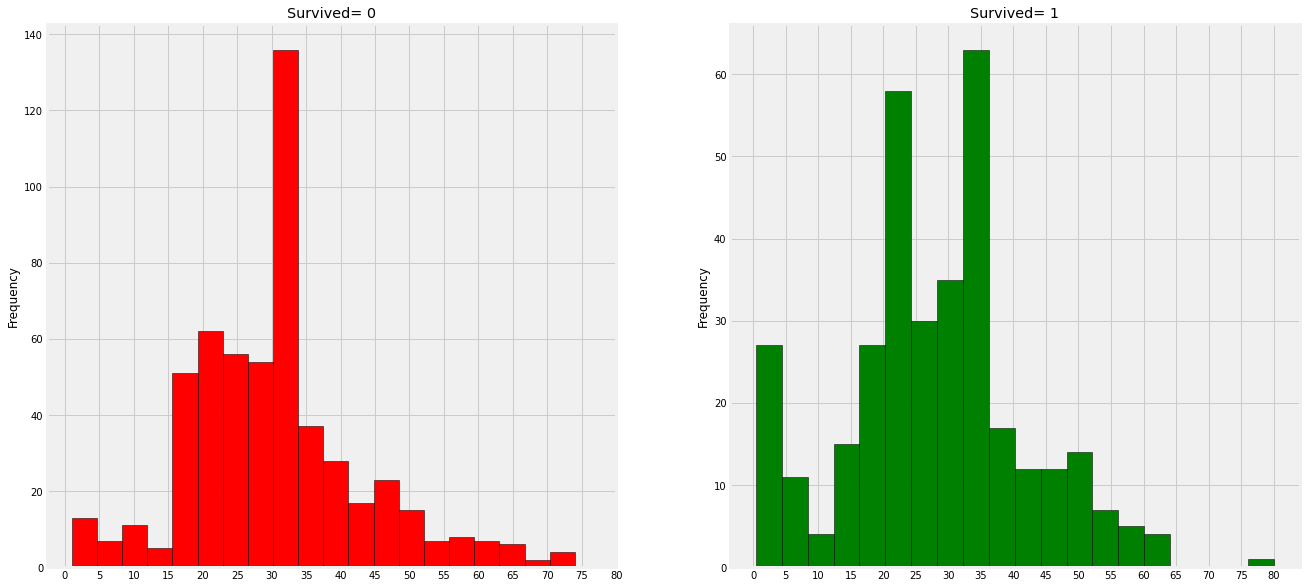

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### <관찰 결과>
1) 유아(5세 미만)는 많이 살아 남았음.(여성과 어린이 우선 정책).

2) 가장 나이 많은 승객이 살아 남았음.(80세 이상 구간).

3) 최대로 많이 사망한 연령대는 30-40 구간임.

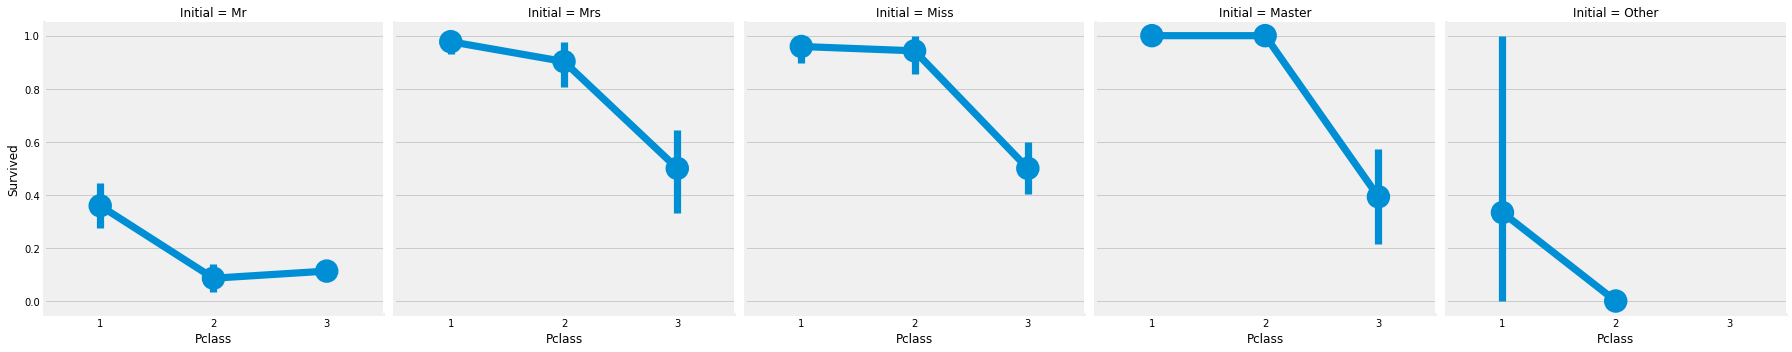

In [43]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

여성과 어린이 우선 정책은 어떤 Pclass와 상관없이 일관되게 유지됨.

## Embarked--> Categorical Value

In [44]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### Chances for Survival by Port Of Embarkation

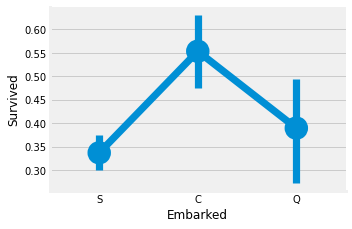

In [45]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

포트C 에서 승선한 승객들의 생존율이 약 0.55로 가장 높고 포트S에 승선한 승객들의 생존율이 가장 낮음,

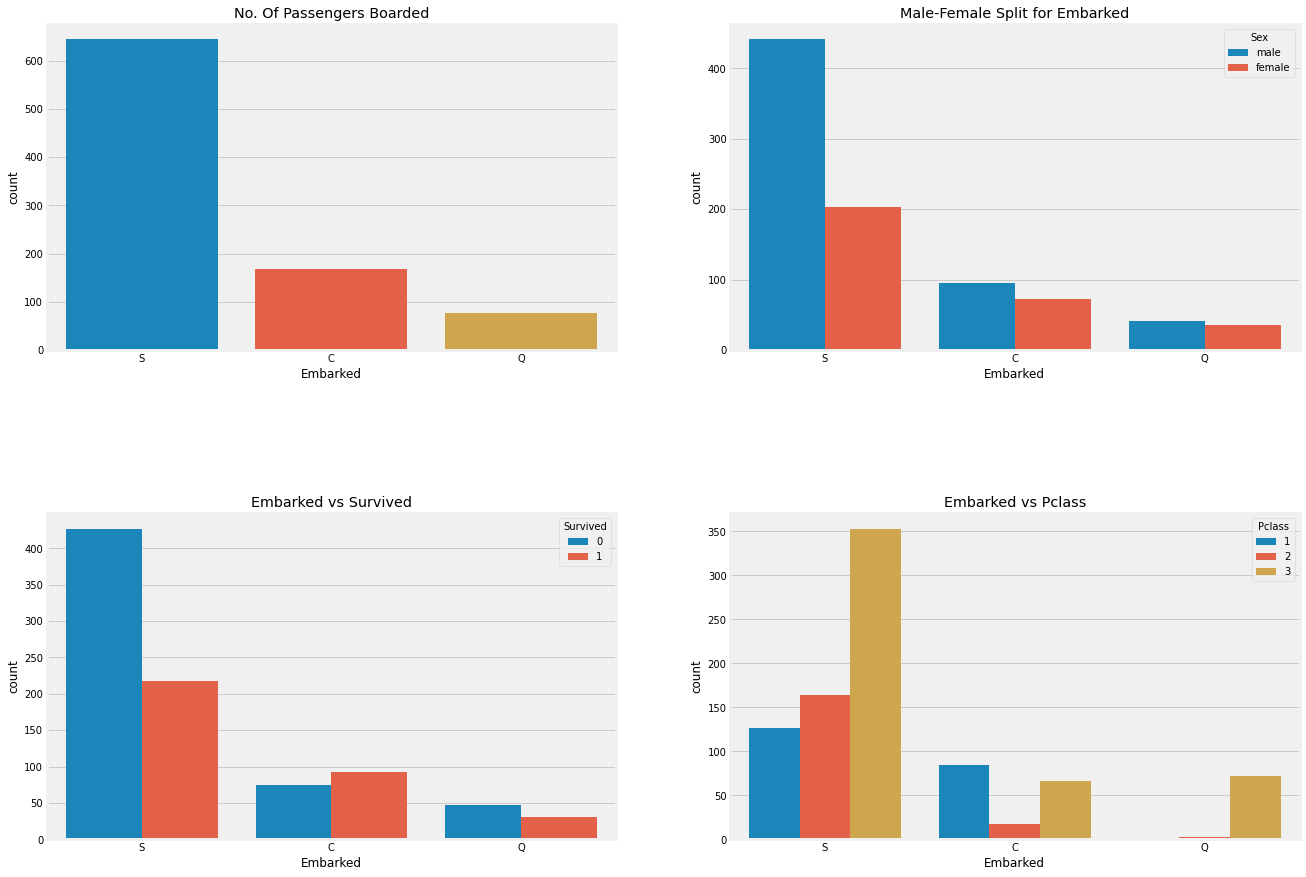

In [46]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### <관찰 결과>
1)포트Q에서 승선한 승객은 대부분 Pclass3 승객임.(약 95%)

2)포트C에서 승선한 승객은 절반 이상 살아남았음. 그 이유는 승객들이 대부분 Pclass1 와 Pclass2 임.

3)포트S에서 승선한 승객은 대부부은 부자였던 것으로 판단됨. 그럼에도 생존율이 좋지 않은 것은 Pclass3 승객 중 약 **81%** 가 살아남지 못했기 때문임. 

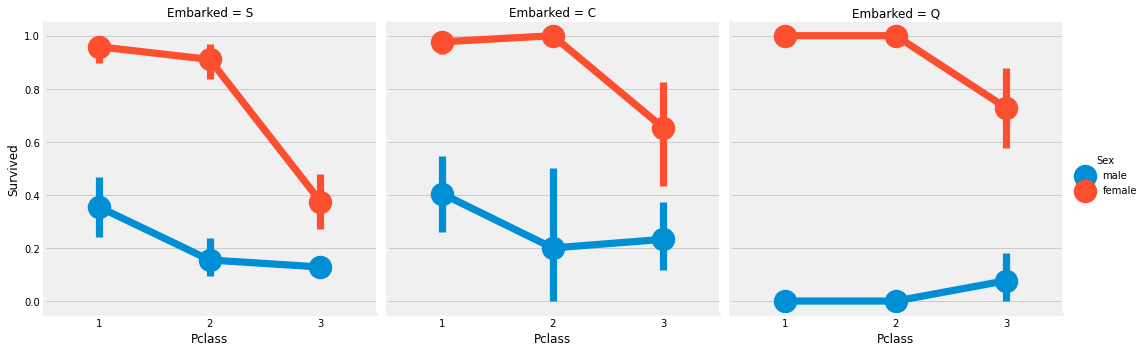

In [47]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### <관찰 결과>

1) Pclass1과 Pclass2에 대한 여성의 생존률은 거의 1임.

2) 포트S에서 승선한 승객들 중 Pclass3인 승객은 남녀 모두의 생존율이 매우 낮음.

3) 포트Q에서 승선한 승객들 중 Pclass와 상관없이 남자에 대해서 생존율이 매우 낮음.


### Filling Embarked NaN

Embarked feature에 대해서 NaN으로 된 데이터는 2개입니다. 이를 S로 대체합니다.(특별한 이유는 없고 포트S에서 승선한 승객이 가장 많으므로 2개를 더한다고 해서 전체적인 데이터 분포에 영향을 주지 않는다고 판담함)

In [48]:
data['Embarked'].fillna('S',inplace=True)

In [49]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSp-->Discrete Feature
이 feature 를 통해서 승객이 혼자 승선했는지 아니면 가족(형제관계 혹은 부부관계)과 함께 승선했는지 여부를 알 수 있음.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife 

In [50]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


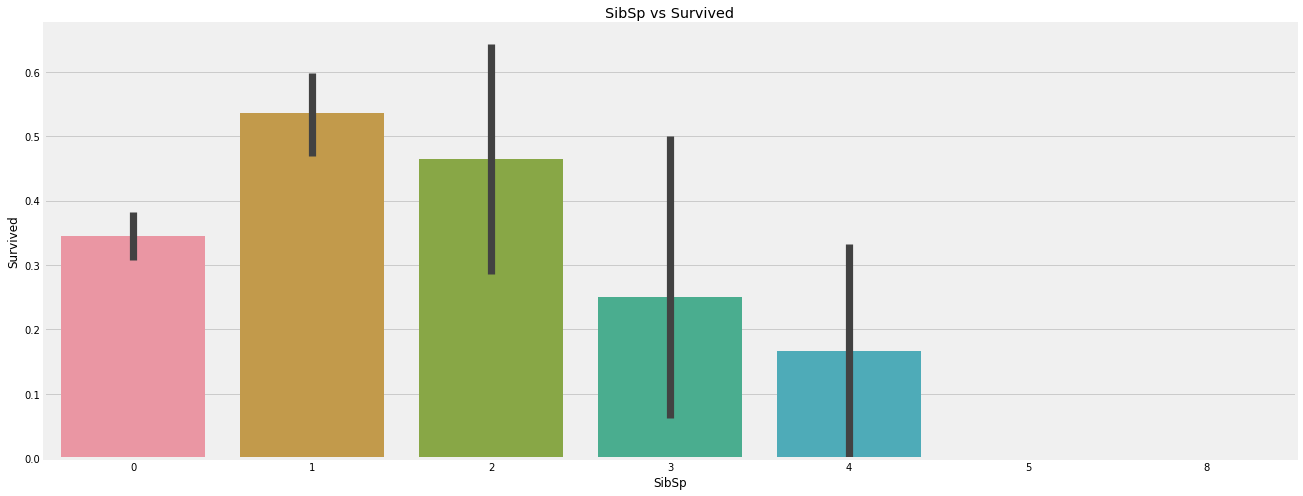

In [51]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax)
ax.set_title('SibSp vs Survived')
plt.show()

In [52]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### <관찰 결과>

- barplot 와 factorplot 은 가족없이 혼자 승선한 승객에 대해서 34.5%의 생존율을 보여줍니다. SibSp 가 증가하면 그래프가 대략적으로 감소합니다. 일반적으로 가족이 있다면, 가족을 구하려고 더 노력할 것입니다. 놀라운 사실은 5-8 명으로 구성된 가족의 생존율은 **0%** 입니다. 

- 이유는 **Pclass** 에 있었습니다. crosstab 은 SibSp > 3 인 승객이 모두 Pclass3에 있음을 보여줍니다. Pclass3(>3)인 승객은 모두 살아남지 못했습니다.

## Parch-->Discrete Feature

이 feature 를 통해서 승객이 혼자 승선했는지 아니면 가족(부모자식관계)과 함께 승선했는지 여부를 알 수 있음.

Parents = father, mother, stepfather, stepmother

Children = son, daughter 

In [53]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


### <관찰 결과>
- crosstab 결과로 보건데...대가족은 Pclass3인 경우가 대부분임.

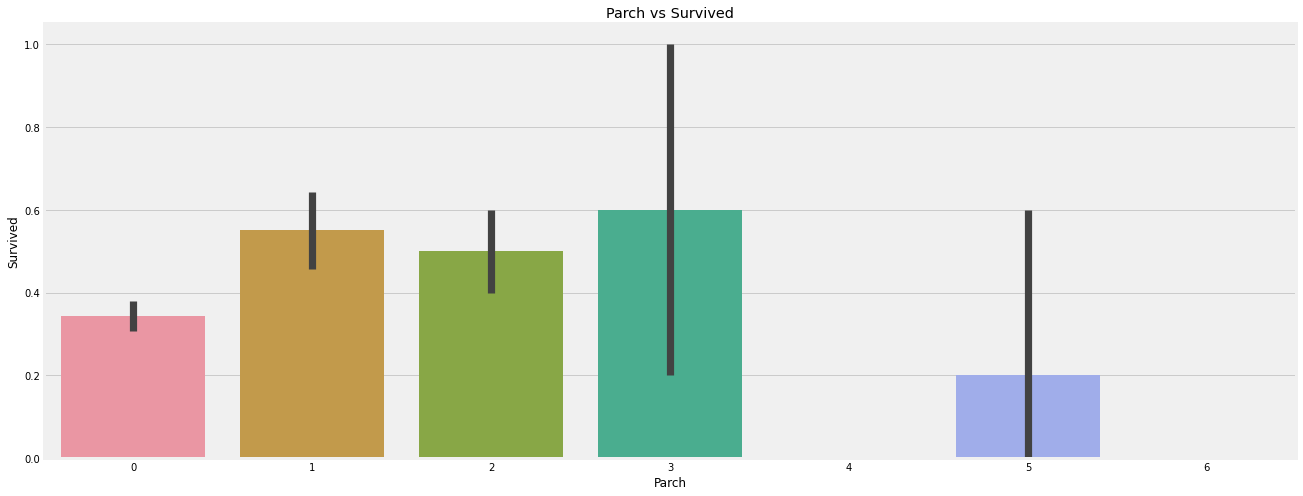

In [54]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax)
ax.set_title('Parch vs Survived')
plt.show()

### <관찰 결과>

- SibSp 와 결과가 매우 비슷합니다. 가족이 함께 탑승한 승객은 생존 기회가 더 큽니다. 그러나 parch 숫자가 올라감에 따라 감소합니다.

- 1-3 명의 가족(부모 혹은 자식)을 가진 승객은 혼자 승선한 승객보다 생존율이 높습니다. 4명 이상의 가족(부모 혹은 자식)을 가진 승객의 생존율은 낮습니다.

## Fare--> Continous Feature

In [55]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


### <관찰 결과>

- 가장 낮은 요금은 **0.0** 입니다.

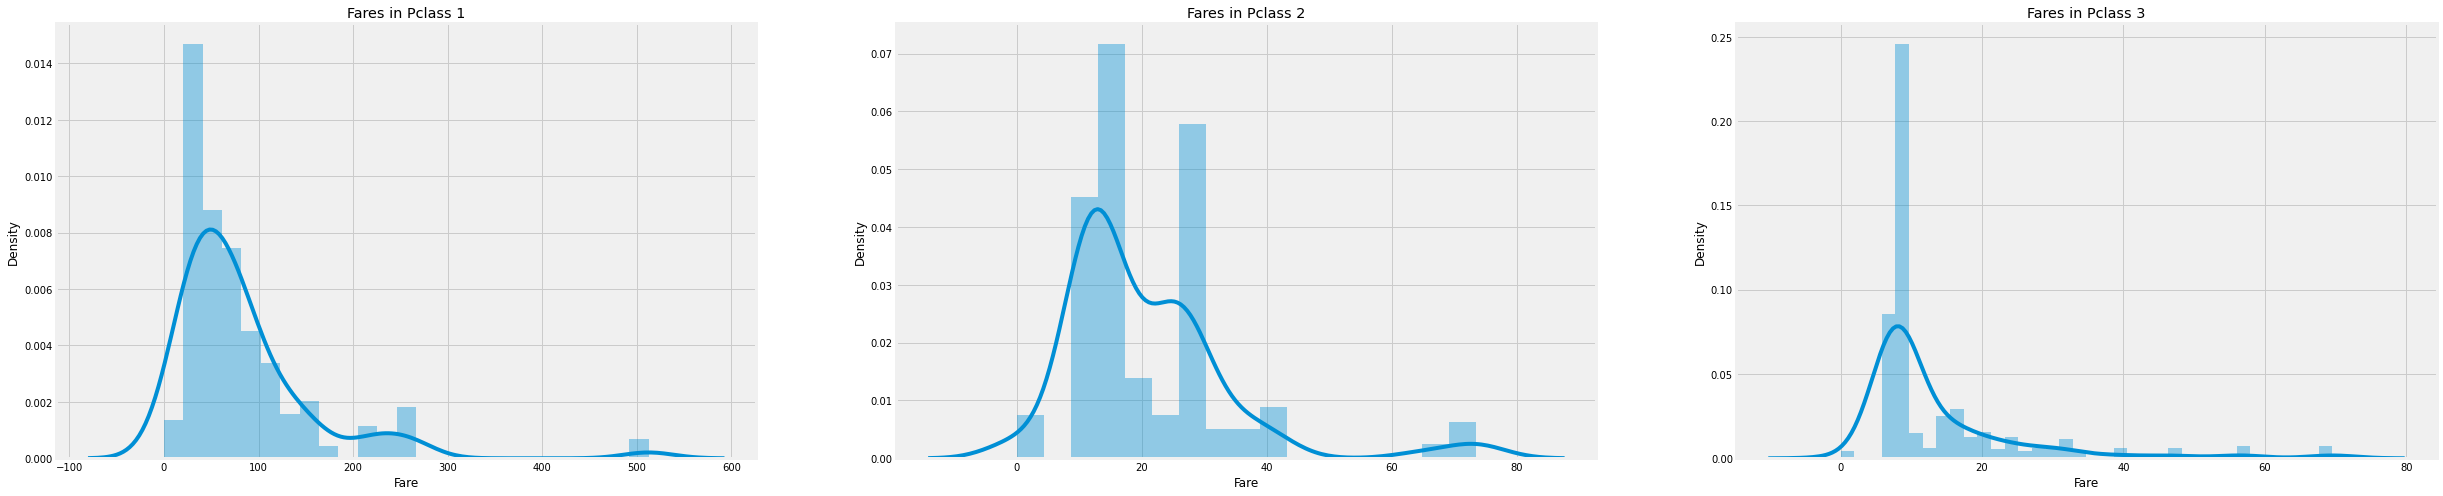

In [56]:
f,ax=plt.subplots(1,3,figsize=(38,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

### <관찰 결과>

- Pclass1 의 분포가 Fare 값으로 봤을 때 가장 넓게 분포되어 있음. 

## <전체 feature들에 대한 관찰 결과>

- **Sex:** 남자보다 여자일 때 생존율이 높음.

- **Pclass:** **1등석 승객**의 생존율이 매우 높음. **Pclass3의 생존율은 매우 낮음**. **여성**의 경우 **Pclass1** 의 생존율이 1이며 **Pclass2** 의 생존율도 높음. **생존하기 위해서 돈과 지위가 매우 중요했다는 사실을 보여줌.**. 

- **Age:** 5-10세 미만의 어린이는 생존율이 높음. 15~35세 사이의 승객이 많이 사망함.

- **Embarked** : 흥미로운 사실을 볼수 있음 **Pclass1 승객의 대다수가 S에서 일어났음에도 불구하고 C에서의 생존율이 더 높음.** Q에서의 생존한 승객은 모두 **Pclass3** 에서 나왔음.

- **Parch+SibSp:** 1-2명의 형제자매/배우자 혹은 1-3명의 부모/자식과 함께 승선한 승객이 혼자 승선했거나 대가족과 함께 승선한 승객보다 생존율이 높음.

## Correlation Between The Features

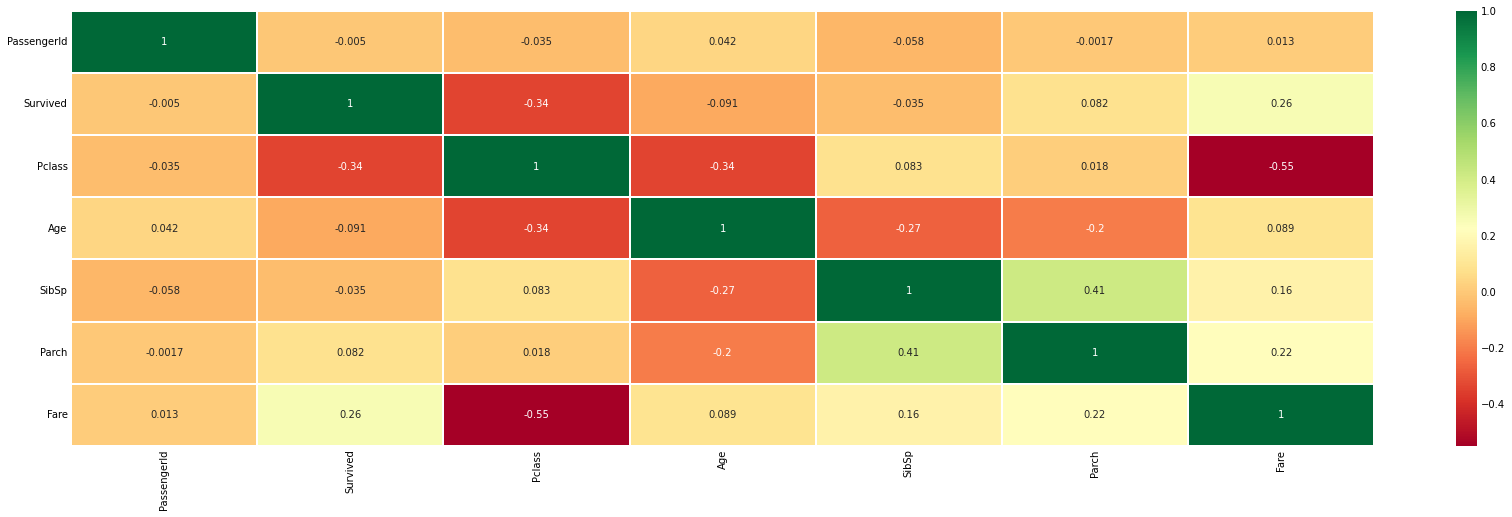

In [57]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(26,8)
plt.show()

## <관찰 결과>

heatmap은 feature들 간에 어떤 상관 관계가 있는지 살펴볼 때 유용합니다. 유의할 점은 알파벳이나 문자열 간의 상관 관계가 명확하게 표현되지 않으므로 숫자형 feature 만 비교된다는 것입니다. 

- **POSITIVE CORRELATION:** If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

- **NEGATIVE CORRELATION:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.

두 feature들 간의 상관관계가 매우 높다는 것은 한 feature의 값이 증가하면 다른 feature의 값도 증가한다는 뜻입니다. 이 경우 두 feature는 모두 매우 유사한 정보를 표현하고 그 정보들의 차이가 거의 없다는 것을 뜻합니다. 이것을 **MultiColinearity** 라고 합니다..

이 경우 **둘 중의 하나는 불필효합니다.**. 모델을 만들거나 Training하는 동안 Training Time을 줄이기 위해서 중복된 feature를 제거하는 노력이 필요합니다.

위의 heatmap 그래프로부터 feature들 간의 상관 관계가 없는 것을 볼 수 있습니다. 가장 높은 상관 관계를 보이는 것을 꼽아보자면 **SibSp와 Parch 사이, 0.41** 정도인데 0.41의 수치가 **MultiColinearity** 라고 판단하기는 힘듭니다. 따라서 feature 제거 없이 모든 feature들을 사용합니다.

# Lesson 3-3: Preprocessing


## 3-3-1 : Feature Engineering

다수의 feature들이 주어졌을 때, 모든 feature가 모두 중요하지는 않습니다. feature들 중에는 제거되어야 하는 redundent feature이 존재하고 때로는 다른 feature들에서 부터 새로운 feature를 추가할 수도 있습니다.

한 예로 앞에서 'Name' feature에서 'Initial' feature를 뽑아내어 새로운 feature로 추가한 경우를 보았습니다. 이 처럼 새로운 feature를 추가하거나 몇가지 feature는 제거하는 것이 필요합니다. 결국 Feature Engineering은 주어진 Dataset에 존재하는 feature를 예측 모델링에 적합한 형태의 Feature로 변환하는 과정이라고 보아야 할 것입니다.

## Age_band

####  Age Feature 의 문제점:
- **Age는 Continous Feature입니다**. 이것이 문제가 될 수 있습니다.

- 예들들어 스포츠 선수를 **Sex(성별)** 로 묶어보면, 쉽게 '남'과 '여' 두가지 그룹으로 나누어 묶을 수 있습니다.

- 만약 스포츠 선수를 **Age** 로 묶어본다면 어떻까요? 만약 30명이 있다면, 이 경우 30개의 서로 다른 Age 값이 있을 것이고 이것이 Continous Feature의 문제점이 됩니다.

**Continous Feature는 Categorical Feature** 로 변경할 필요가 있습니다. 이 때 사용되는 기법이 Binning 혹은 Normalisation 입니다. 여기서는 Binning을 사용해 봅니다.

승객의 나이중 최대값이 80이므로... 0-80 구간을 5개의 bin으로 나누어봅니다. 80/5=16.
하나의 bin의 사이즈는 16이 됩니다.

In [58]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [59]:
type(data['Age_band'].value_counts())

pandas.core.series.Series

In [60]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


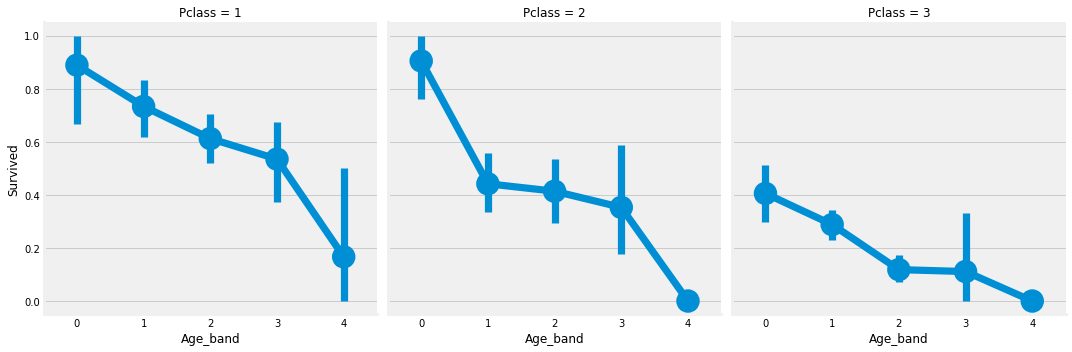

In [61]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

### <관찰 결과>

Pclass와 관계없이 Age_band가 증가함에 따라 생존율이 감소합니다.


## Family_Size and Alone
"Family_size" 와 "Alone" 이라는 feature를 추가해서 분석해 봅시다. "Family_size" 와 "Alone"는 "Parch" 과 "SibSp"를 이용해서 만듭니다. "Family_size"의 경우는 생존율이 승객의 "Family Size"와 관련이 있는지를 확인할 수 있도록 "Parch" 과 "SibSp"를 합한 feature를 새로 만든 것입니다. "Alone"은 승객이 혼자 승선했는지 여부를 나타내는 새로운 feature 입니다.

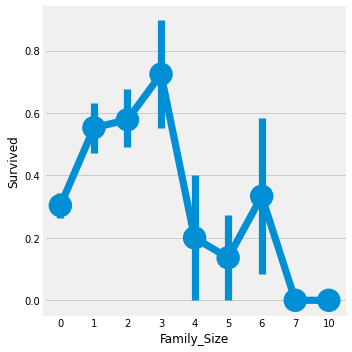

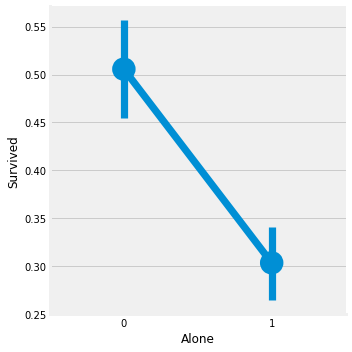

In [67]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
#ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
#ax[1].set_title('Alone vs Survived')
plt.close(0)
plt.close(1)
plt.show()

**Family_Size=0 는 가족없이 혼자 승선한 승객이라는 뜻입니다.** family_size=0인 경우 생존율니 낮습니다. family_size > 4 인 경우 생존율이 급격히 떨어집니다. 따라서 이 feature도 예측 모델에 유입될 수 있는 중요한 feature라고 보여집니다.

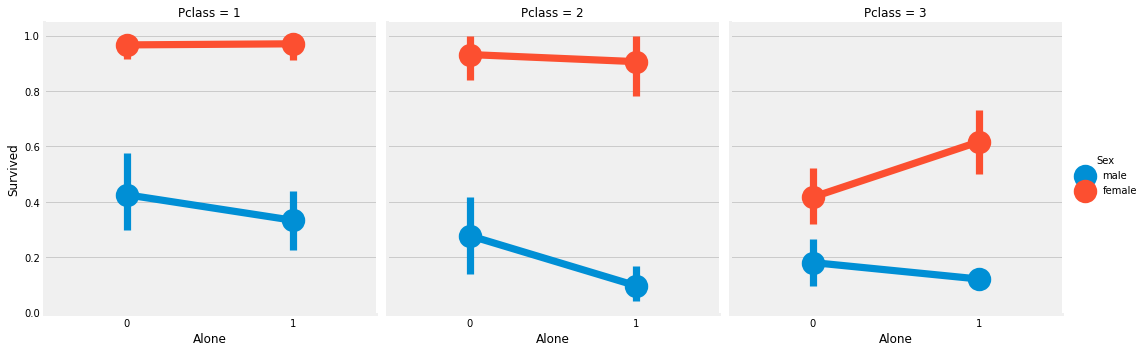

In [ ]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

### <관찰 결과>

혼자 승선한 승객은 "Sex", "Pclass"와 상관없이 생존율이 낮습니다. 단 예외적으로 Pclass3 이면서 여성인 승객인 경우는 혼자 승선한 승객인 경우가 가족과 함께 승선한 승객보다 생존율이 높습니다.

## Fare_Range

"Fare"는 Continous Feature 입니다. Continous Feature를 Ordinal Feature로 바꿉니다. 이 때 **pandas.qcut** 를 사용합니다.

**qcut** 은 입력으로 전달된 bin의 갯수만 큼 나누어 줍니다. 5 bin으로 나눈다면, 일정한 값으로 나누어진 5개의 구간이 리턴됩니다.

In [ ]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


### <관찰 결과>

**fare_range 가 증가하면, 생존율이 증가한다.**

## Fare_cat

In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

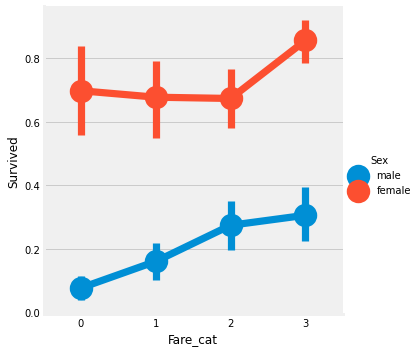

In [ ]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

### <관찰 결과>

**fare_cat 가 증가하면, 생존율이 증가한다.**

## 3-3-2 : Cleaning

## Converting String Values into Numeric

일반적으로...머신러닝 모델의 입력으로 String 값을 넣을 수 없으므로, "Sex", "Embarked" 같은 문자형 feature을 숫자형 feature들로 변환해야만 합니다.

In [ ]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## Dropping UnNeeded Features

**Name**--> We don't need name feature as it cannot be converted into any categorical value.

**Age**--> We have the Age_band feature, so no need of this.

**Ticket**--> It is any random string that cannot be categorised.

**Fare**--> We have the Fare_cat feature, so unneeded

**Cabin**--> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

**Fare_Range**--> We have the fare_cat feature.

**PassengerId**--> Cannot be categorised.

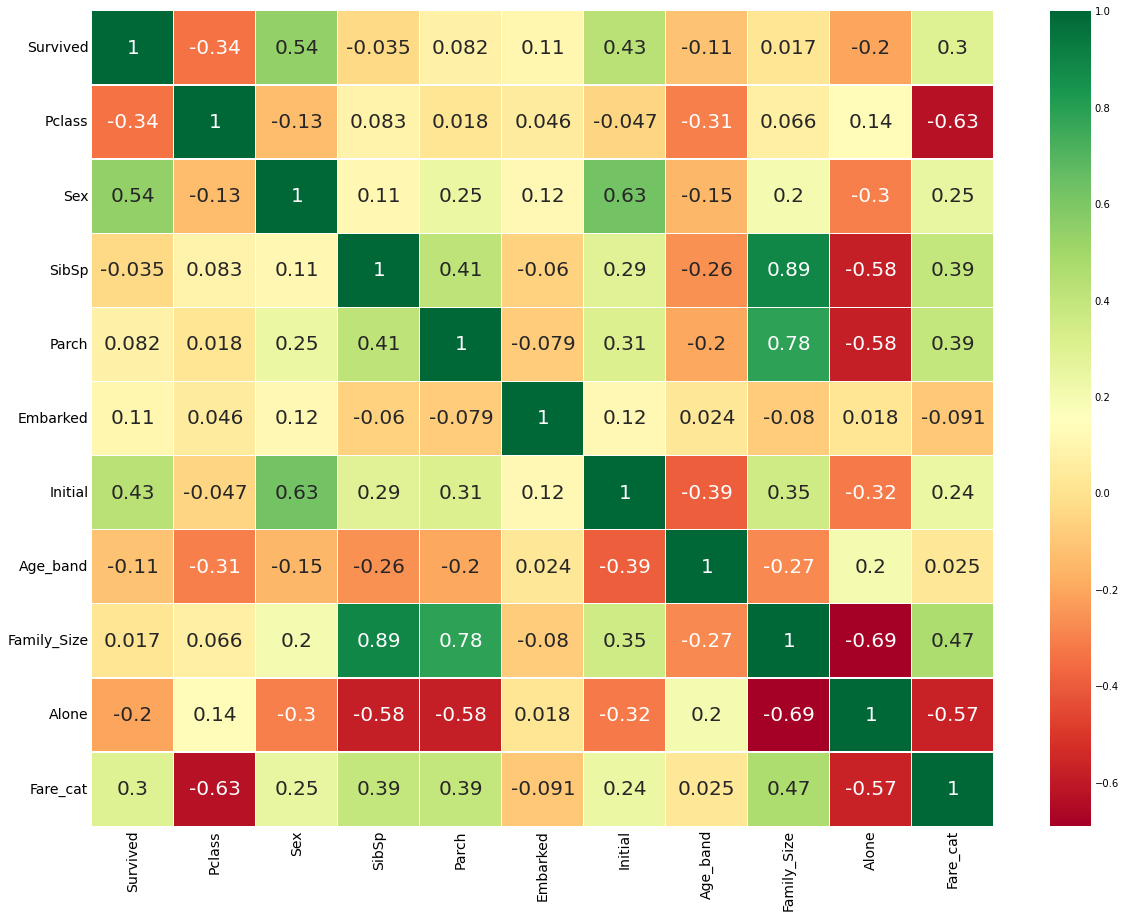

In [ ]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### <관찰 결과>

heatmap을 봤을 때, feature들 간의 Positive 상관관계를 볼 수 있다. 예들들어...**SibSp and Family_Size**, **Parch and Family_Size** 또한 Negative 상관관계도 볼 수 있다. 예들들어...**Alone and Family_Size**

# Lesson 3-4: Model Selection

## 3-4-1 : Running Basic Algorithms
지금까지 EDA를 통해서 Titanic 데이터에 대한 인사이트를 얻었습니다. 하지만 EDA만으로 우리가 풀고자하는 문제(Titanic 승객들의 사고에서 살아남을지 죽을지 여부를 예측)에 대한 모델의 성능을 높힐 수 없습니다. 지금부터는 여러가지 Classification 알고리즘을 통해 어떻게 문제를 풀수 있을지 알아봅니다.

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [ ]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [ ]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.8059701492537313


### K-Nearest Neighbours(KNN)


In [ ]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


**n_neighbours** 속성의 값을 변경함에 따라 KNN 모델의 정확도가 변경됩니다. 기본값은 **5**입니다. n_neighbours의 다양한 값에 대한 정확성을 확인할 수 있습니다.

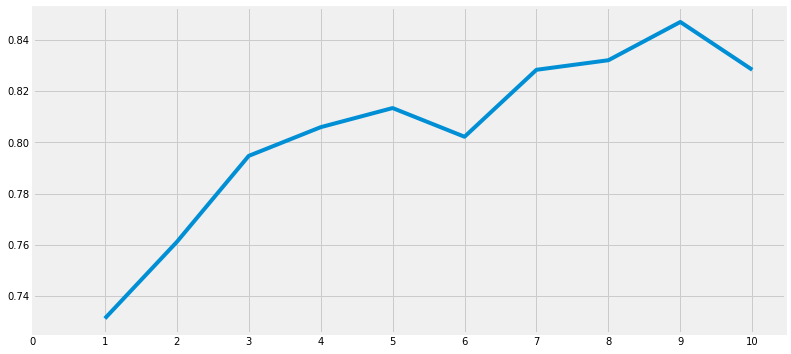

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [ ]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [ ]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests


In [ ]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776


모델의 정확성(Accuracy) 만이 Classifier(=Classification Model)의 견고성(Robustness)을 결정하는 유일한 요소는 아닙니다. Classifier를 훈련 데이터(Training Data)를 통해 학습하고 테스트 데이터(Test Data)를 통해 테스트 한 결과 정확도(Accuracy)가 90%라고 가정해 봅시다.

이것이 매우 정확한 정확도이기는 하지만 새로운 테스트 데이터에 대해 90%가 될 것이라고 확신 할 수 없습니다. 왜냐하면 훈련 데이터(Training Data) 및 테스트 데이터(Test Data)가 변경되면 Classifier의 정확도(Accuracy)는 변경되기 때문입니다. 데이터의 분포에 따라 정확도가 더 좋아지거나 더 나빠질 수 있습니다. 이를 **Model Variation** 이라고 합니다.

Variation을 극복하고 더 일반화 된 모델을 얻기위해 **Cross Validation** 라는 기법을 사용합니다.

## 3-4-2 :  Cross Validation

대부분의 경우 데이터는 불균형합니다. 특히 데이터셑의 크기가 작은 경우 테스트셑에 대한 성능 평가의 신뢰성이 떨어지게 됩니다. 테스트셑을 어떻게 잡느냐에 따라 성능이 매우 다르게 측정될수 있고 이를 해결하기 위해 Cross Validation은 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다. 첫 번째 Iteration에서는 BCDE를 트레이닝 셋으로, A를 테스트셋으로 설정한 후, 성능을 평가합니다. 두 번째 Iteration에서는 ACDE를 트셋으로, B를 테스트셋으로하여 성능을 평가합니다. 그러면 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가하게 됩니다. 

![](https://t1.daumcdn.net/cfile/tistory/990DD2465B72F1491E)

출처: https://3months.tistory.com/321 [Deep Play]. 

## K-Fold Cross Validation
1) K-Fold Cross Validation은 먼저 데이터 집합을 k개의 부분 집합으로 나눕니다.
2) 데이터 세트를 (k = 5) 부분으로 나누어 봅시다. 우리는 테스트를 위해 1 부분을 예약하고 4 부분에 걸쳐 알고리즘을 훈련시킵니다.
3) 각 Iteration 에서 테스트 부분을 변경하고 학습하는 프로세스를 계속 진행합니다. 
4) 모든 Iteration이 끝나고 총 5개의 성능 평가지표가 생기게 되는데, 보통 이 값들을 평균을 내어 모델의 성능을 평가합니다.

각 Iteration에서 평가된 모델은 어떤 경우는 underfit 어떤 경우는 overfit 될 수 있습니다. 이들에 대한 평균을 구하므로...Cross Validation을 통해 좀 더 일반화된 모델을 얻을 수 있습니다.

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.805855,0.042552
Naive Bayes,0.795843,0.054861
Random Forest,0.810387,0.047466


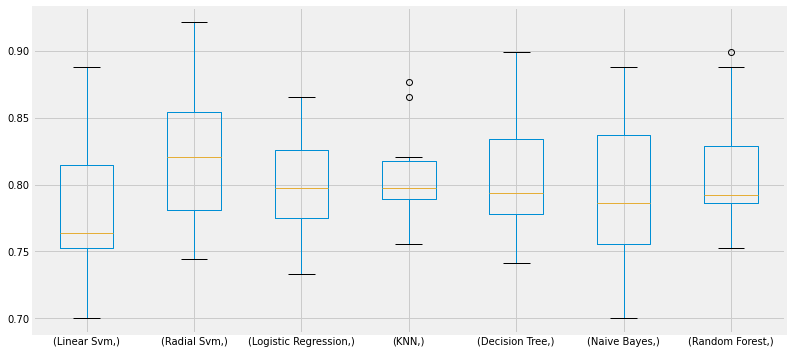

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

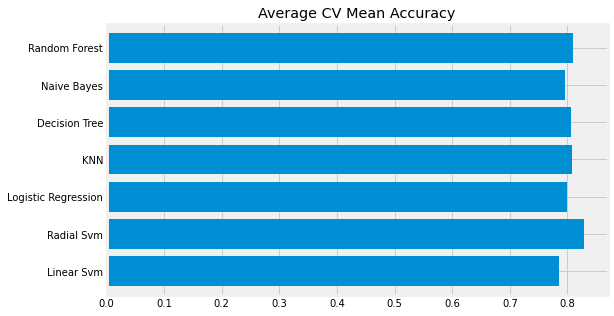

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

정확도(Accuracy)가 가장 일반적으로 쓰이는 성능평가 지표이고 직관적으로 이해하기 쉽다는 장점이 있지만...데이터의 분균형으로 인해 클래스의 비율이 한 쪽으로 치우쳐 있을 경우는 평가가 어렵다.(Imbalanced dataset problem)

혼동행렬(Confusion Matrix)은 정확도보다 더 자세한 정보를 보여준다.

![](https://image.slidesharecdn.com/5-180206050322/95/5model-evaluation-and-improvementepoch2-2-11-638.jpg?cb=1517893429)

출처 : https://www.slideshare.net/RickyPark3/5model-evaluation-and-improvementepoch2-2-87291677

참고 : https://bcho.tistory.com/1206

In [ ]:
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
pd.DataFrame(confusion_matrix(Y, y_pred), columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

,Predicted Negative,Predicted Positive
Actual Negative,491,58
Actual Positive,95,247


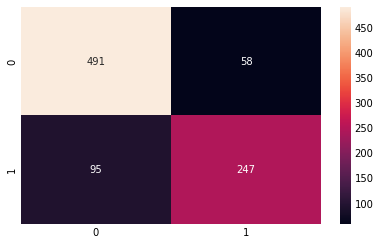

In [ ]:
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),annot=True,fmt='2.0f')

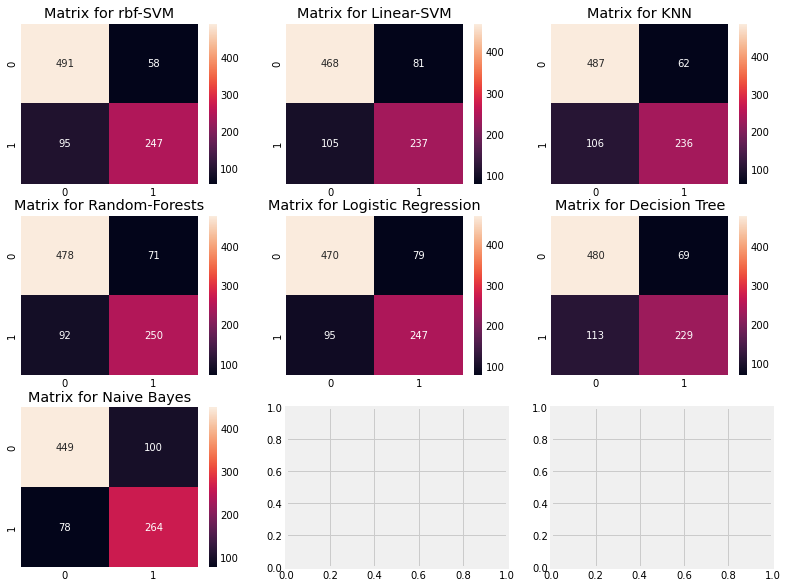

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### Interpreting Confusion Matrix

왼쪽 대각선은 각 클래스에 대한 올바른 예측의 수를 나타내지 만 오른쪽 대각선은 잘못된 예측의 수를 나타냅니다. rbf-SVM에 대한 첫 번째 플롯을 분석해 보겠습니다.

1)Accuracy 구하기 : 올바르게 예측한 수는 **491(for dead) + 247(for survived)** 따라서 Mean CV Accuracy 는 **(491+247)/891 = 82.8%** 입니다.

2)**Errors** 보기 : 58명의 사망자를 생존자로 잘못 분류하고 95명의 생존자를 사망자로 잘못 분류했습니다. 따라서 이 모델은 살아남은 것처럼 죽은자를 예측함으로써 더 많은 실수를 범했습니다.

rbf-SVM이 죽은 승객을 올바르게 예측할 확률이 높지만 NaiveBayes는 살아남은 승객을 정확하게 예측할 확률이 높다고 말할 수 있습니다.

### Hyper-Parameters Tuning

기계 학습 모델은 블랙박스와 같습니다. 이 블랙박스에는 몇 가지 기본 매개변수 값이 있고 더 나은 모델을 얻기 위해 조정하거나 변경할 수 있습니다. 예를들어 SVM 모델의 C와 Gamma와 같은 것입니다. 이것을 우리는 hyper-parameter라고 부릅니다. 우리는 hyper-parameter 조정을 통해 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있습니다. 이것을 Hyper-Parameter Tuning이라고 합니다.

그러면, SVM와 RandomForests 2가지 알고리즘에 대해서 각각 Hyper-Parameter Tuning을 진행하도록 합시다.

#### SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


#### Random Forests

In [ ]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


Rbf-Svm에 대한 최고의 Accuracy 스코어는 **82.82% 이고 이때 Hyper-Parameter는 C=0.05 이고 gamma=0.1** 이다.

RandomForest에 대한 최고의 Accuracy 스코어는  **81.8% 이고 이때 Hyper-Parameter는 n_estimators=900**.

# Lesson 3-5: Model Evaluation & Prediction

## 3-5-1 : Ensembling

**다수의 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측결과를 평균하여 예측**

- 앙상블 모델은 대체적으로 단일 모델 대비 성능이 좋음.
- 앙상블 모델을 다시 앙상블하는 기법인 Stacking과 Weighted Blending도 있음.
- 앙상블 모델은 적절한 **Hyperparameter 튜닝**이 중요함.
- 앙상블 모델은 일반적으로 학습시간이 많이 소요됨.
- 앙상블 모델은 모델 튜닝에 걸리는 시간이 많이 소요됨.

앙상블(Ensemble) 학습은 여러 개의 학습 알고리즘을 사용하고, 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법입니다. 하나의 강한 머신러닝 알고리즘보다 여러 개의 약한 머신러닝 알고리즘이 낫다 라는 아이디어를 가지고 이해하면 좋습니다.

이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류 시에는 앙상블이 뛰어난 성능을 나타내고 있습니다.

문제와 데이터에 따라 단일 모델의 성능이 더 좋은 경우도 있습니다. 하지만 앙상블 기법을 사용하면 더 유연성있는 모델을 만들며 더 좋은 예측 결과를 기대할 수 있습니다.

Classification에서 앙상블 학습의 유형은 가장 많이 알려진 Voting, Bagging, Boosting, Stacking 등이 있으며, 그 외에도 다양한 앙상블 학습의 유형이 있습니다.

1) Voting : 투표를 통해 결과 도출

2) Bagging : 샘플 중복 생성을 통해 결과 도출

3) Boosting : 이전 오차를 보완하면서 가중치 부여

4) Stacking : 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측


**Reference**

* [보팅(Voting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
* [배깅(Bagging)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
* [부스팅(Boosting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

## Voting

보팅(Voting) 또는 에버리징(Averaging) 은 가장 쉬운 앙상블 기법입니다. 이 둘은 서로 다른 알고리즘을 가진 분류기를 결합하는 방식입니다.

다음과 같은 과정으로 진행이 됩니다.

1. 일정 수의 base model과 predict를 만듭니다.
    - Training 데이터를 나누어 같은 알고리즘을 사용하거나
    - Training 데이터는 같지만 다른 알고리즘을 사용하거나
2. Voting을 진행합니다.
    - Majority Voting (Hard Voting) : 각 모델은 test 데이터셋(또는 인스턴스)의 결과를 예측합니다. 그리고 예측값들의 다수결로 예측값을 정합니다.Hard Voting 방식에서는 다수의 선택을 받은 클래스가 예측 결과값이 됩니다. 예를 들어, 분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1이 최종 예측값으로 결정됩니다.
    - Weighted Voting (Soft Voting) : 각 모델은 Test 데이터셋의 결과 가능성을 예측합니다. 그리고 이 가능성에 특정 연산을 하여 분류 label의 확률값을 계산합니다. 이 방법에서 가중치의 연산은 원하는 방식으로 할 수 있고, 보통 평균을 사용합니다. 일반적으로 Majority Voting보다 유연한 결과를 얻을 수 있으며, 예측 성능이 좋아 더 많이 사용합니다. 예를 들어, class 0이 나올 확률이 (0.5, 0.9, 0.9, 0.6, 0.6)이었고, class 1이 나올 확률이 (0.4, 0.1, 0.1, 0.4, 0.5) 이었다면, 

        - class 0이 나올 최종 확률은 (0.5+0.9+0.9+0.6+0.6) / 5 = 0.54, 
        - class 1이 나올 최종 확률은 (0.4+0.1+0.1+0.4+0.5) / 5 = 0.3 

In [ ]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8237952559300874


## Bagging


배깅(Bagging) 은 Bootstrap Aggregating의 약자입니다. 배깅의 핵심은 평균을 통해 분산(variance)값을 줄여 모델을 더 일반화시킨다는 점입니다.
배깅은 Voting과 유사한 방식으로 진행이 됩니다. 정확히는 최종적으로는 Voting을 사용합니다.

![Bagging](https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png)

- 일정 수의 base model을 만듭니다.
- 모델들의 알고리즘은 모두 같습니다.
- 각각의 모델은 훈련데이터셋에서 랜덤으로 만든 서브 데이터셋을 각각 사용합니다.
- 서브 데이터셋을 만드는 과정을 부트스트래핑(Bootstrapping) 분할 방식이라고 합니다. 각각의 서브 데이터셋은 중첩이 가능합니다. 
- 배깅의 경우에는 데이터 생성과 훈련이 개별 모델에서 진행되므로, 병렬 연산이 가능합니다.


#### Bagged KNN

배깅(Bagging)은 high variance을 가진 모델에서 잘 작동합니다. 예를들어 Decision Tree 입니다. 또한 작은 **n_neighbours** 값을 가진 KNN 에서도 사용가능합니다.

In [ ]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


#### Bagged DecisionTree


In [ ]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


#### Random Forests 는 Bagging이 적용된 대표적인 알고리즘입니다. 
#### Bagged DecisionTree vs Random Forests

![](https://qph.fs.quoracdn.net/main-qimg-132ee5828d1938659e493d902991cca5)

## Boosting

부스팅(Boosting) 알고리즘은 여러 개의 약한 학습기(weak learner = estimater)를 순차적으로 학습-예측하며 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식입니다.

계속해서 분류기에게 가중치를 부스팅하면서 학습을 진행하기에 부스팅 방식으로 불립니다.

기존 Boosting 방법은 순차적인 연산이 필수적이므로 병렬 연산이 불가능합니다. 그렇기에 대용량 데이터셋에서는 학습 시간이 매우 많이 필요할 수 있습니다.

부스팅의 대표적인 알고리즘은 AdaBoost 와 Gradient Boost 가 있고, 최근 성능면에서 인정을 받아 가장 많이 사용하는 부스팅 계열 알고리즘으로 XGBoost 와 LightGBM 이 있습니다. 그 외에도 CatBoost와 같은 알고리즘이 있습니다.

#### AdaBoost(Adaptive Boosting)

에이다 부스트(AdaBoost) 는 Adaptive boosting의 약자로 오류 데이터에 가중치를 부여하며 부스팅을 수행하는 대표적인 알고리즘입니다.

메인 아이디어는 잘못 분류한 데이터에 가중치를 부여하여, 다음 분류기는 이를 더 잘 분류하게 만드는 것입니다. 최종적으로는 이 분류기를 합쳐 최종 분류기를 만듭니다.

오류 데이터에 가중치를 부여하기 때문에 이상치(outlier)에 민감합니다.

약한 학습기(weak learner = estimater)는 명시하지 않을 경우 Default로 Decsion Tree 이고 다른 알고리즘으로 바꿀 수 있습니다.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Gradient Boosting

그래디언트 부스트(Gradient Boost Machine) 알고리즘은 AdaBoost와 거의 유사합니다. 하지만 가중치 업데이트를 경사하강법(Gradient Descent) 로 한다는 점이 다릅니다.

평균적으로 Random Forests보다 좋은 예측 성능을 가지지만, 하이퍼파라미터 튜닝 노력이 필요하고 그만큼 수행 시간이 오래걸린다는 단점도 있습니다. 순차적인 진행때문에 병렬 수행이 불가능하다는 단점도 있습니다. 성능면에 초점을 두어 많은 GBM 기반 알고리즘이 연구되었고, 그 중 가장 많이 사용하는 것이 XGBoost 와 LightGBM 입니다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

XGBoost(eXtreme Gradient Boost) 는 GBM에 기반하는 알고리즘이며, 여러 가지 장점을 가진 알고리즘입니다. GBM에 비해 빠르고, 과적합 규제 등의 장점을 가집니다. 그 외에도 분류/회귀 모두 예측 성능이 우수하고, 자체 내장 교차 검증, 결손값 처리 등의 장점이 있습니다.

병렬 CPU를 이용하여 GBM보다 빠른 수행을 합니다. 반대로 말하면 속도를 기대하려면 multi-CPU core가 필요합니다. 이 외에도 tree pruning 등의 다양한 기능을 통해 속도를 향상시켰습니다.

XGBoost는 GBM보다는 빠르지만 여전히 느린 알고리즘입니다. 심지어 GridSearchCV를 이용하여 하이퍼파라미터 튜닝을 수행하면 시간이 너무 오래 걸립니다.


In [ ]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


#### LightGBM(Light Gradient Boosting Methods)

XGBoost에 비해 훨씬 빠르며, 메모리 사용량도 상대적으로 적습니다. 예측 성능 자체도 큰 차이는 없습니다. 하지만 적은 수의 데이터셋에는 과대적합이 발생하기 쉽다는 단점이 있습니다. 적다는 기준은 애매하나 공식 문서에는 10000건 이하의 데이터셋이라고 기술하고 있습니다.

알고리즘의 메인 아이디어는 GBM 계열의 트리 분할 방법에서 트리 균형 맞추는 과정을 생략하며 성능을 높였다는 점입니다. 대부분의 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위해 균형 트리 분할(Level Wise) 방식을 사용합니다. 균형 잡힌 트리는 과대적합에 강하지만 시간 비용이 큽니다.

LightGBM에서는 리프 중심 트리 분할(Leaf Wise) 방식을 사용해 비대칭이지만 예측 오류 손실 값을 줄이는 방식을 선택하여 트리를 분할합니다. 이런 이유로 빠르고, 좋은 성능을 가질 수 있습니다.

In [ ]:
import lightgbm as lgbm
lightgbm=lgbm.LGBMClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(lightgbm,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for LightGBM is:',result.mean())

The cross validated score for LightGBM is: 0.8126716604244695


## Stacking

stacked generalization 으로 알려진 기법입니다.

현실 모델에 적용하는 경우는 적으나, Kaggle대회에서 높은 순위를 얻기 위해 많이 사용됩니다.

가장 핵심 아이디어는 머신러닝 알고리즘으로 훈련 데이터셋을 통해 새로운 데이터셋을 만들고, 이를 데이터셋으로 사용하여 다시 머신러닝 알고리즘을 돌리는 것입니다. 보통은 서로 다른 타입의 모델들 을 결합합니다.

스태킹에는 총 2가지 종류의 모델이 필요합니다.

- 개별적인 기반 모델 : 성능이 비슷한 여러 개의 모델
- 최종 메타 모델 : 기반 모델이 만든 예측 데이터를 학습 데이터로 사용할 최종 모델

여러 개의 개별 모델들이 생성한 예측 데이터를 기반으로 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트를 재 생성하는 기법입니다.

모델을 통해 input을 만들고, 다시 모델에 넣는 구조때문에 meta-model 이라고도 부릅니다.



In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
stack_models = [
    ('KNN',KNeighborsClassifier(n_neighbors=10)),
    ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
    ('svm',svm.SVC(kernel='linear',probability=True)),
    ('lgbm', lgbm.LGBMClassifier(n_estimators=900,learning_rate=0.1))
]

In [ ]:
stack_classfier = StackingClassifier(stack_models, final_estimator=xgboost, n_jobs=-1)

In [ ]:
stack_classfier.fit(train_X, train_Y)
stack_pred = stack_classfier.predict(test_X)


## Hyper-Parameter Tuning for AdaBoost

AdaBoost 알고리즘이 가장 높은 Accuracy를 가진 Classifier로 선택되었으니 Hyper-Parameter Tuning 을 통해서 조금 더 성능을 높혀보도록 하겠습니다.

In [ ]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


### <관찰 결과>

Hyper-Parameter Tuning 을 통해서 AdaBoost 알고리즘의 가장 높은 Accuracy는 **83.16%** 이고 이때의 Hyper-parameter는 **n_estimators=200 ,learning_rate=0.05** 입니다.

### Confusion Matrix for the Best Model

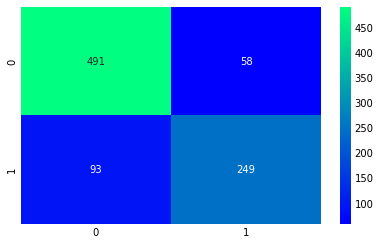

In [ ]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## 3-5-2 : Feature Importance

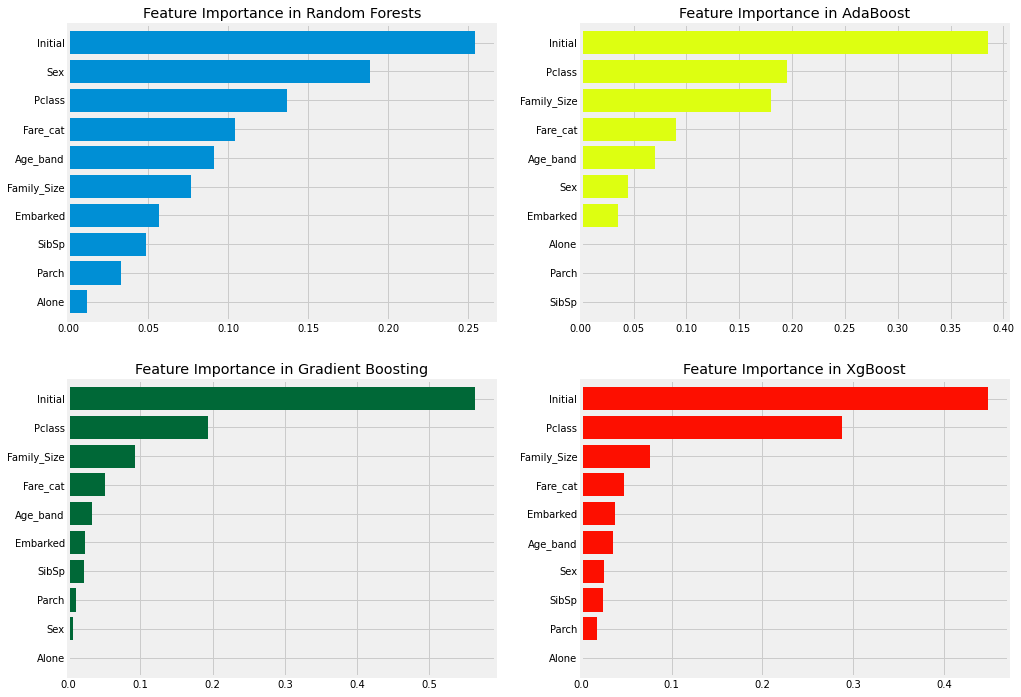

In [ ]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

### <관찰 결과>

1)공통적인 important feature는 'Initial', 'Fare_cat', 'Pclass', 'Family_Size' 입니다.

2)'Sex' feature 중요성이 높지 않아보이는데, 'Sex'는 'Pclass'와 함께 고려되었을 때 매우 좋은 차별적인 feature로 관찰되었었던 결과로 보았을 때 약간 놀랍습니다. 'Sex' feature는 Random Forests에서만 중요해 보입니다.

'Initial'이 모든 Classifier의 상위 Importance feature로 올라와 있는 것을 볼 수 있는데, 이것은 'Sex'와 'Initial' 간에 Positive Relation이 있음이 이미 관찰되었기 때문에 'Initial'과 'Sex' feature 는 모두 의미적으로 성별을 나타낸다고 봐야 합니다.

3)'Pclass'와 'Fare_cat'은 의미적으로 승객의 상태를 나타내고, 'Family_Size'는 'Alone', 'Parch' 및 'SibSp'와 같은 의미를 나타낸다고 봐야 합니다.

## 3-5-3 : Prediction

### Making Prediction Result into CSV File

In [ ]:
dirname = '/content/drive/My Drive/nhfire//data/titanic'
#dirname = './data/titanic'

In [ ]:
test_X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
421,3,0,0,0,2,0,1,0,1,0
618,2,1,2,1,0,2,0,3,0,3
116,3,0,0,0,2,0,4,0,1,0
310,1,1,0,0,1,2,1,0,1,3
57,3,0,0,0,1,0,1,0,1,0


In [ ]:
test_X.index

Int64Index([421, 618, 116, 310,  57, 887, 613, 232, 498, 299,
            ...
            843, 876,  47, 853, 873, 653, 500, 512, 758, 607],
           dtype='int64', length=268)

In [ ]:
ada.fit(X,Y)
Y_pred = ada.predict(test_X)
Y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0])

In [ ]:
result = pd.DataFrame({
        "PassengerId": test_X.index,
        "Survived": Y_pred
    })
result.to_csv(dirname + '/result.csv', index=False)